# 4. What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)

In [1]:
# Importing Libraries & Dataset
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r'D:\Data_Science\Projects\Python_Data_Analyst_Job_Market_Analysis\Dataset\data_jobs.csv')

In [2]:
# Cleaning Data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
# Filter: US Data Analyst Jobs
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,NaN,NaN,NaN,Assuredpartners,NaN,NaN
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,NaN,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,NaN,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,NaN,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,NaN,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785603,Data Analyst,Junior Data Analyst,"Santa Monica, CA",via Trabajo.org,Full-time,False,"California, United States",2023-09-12 06:00:50,False,False,United States,NaN,NaN,NaN,"Ramax Search, Inc.","[sql, vba, python, excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']..."
785626,Data Analyst,Data Acquisition Associate,"Tarrytown, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-29 06:01:29,False,False,United States,NaN,NaN,NaN,Planet Group,[microsoft teams],{'sync': ['microsoft teams']}
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,NaN,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,NaN,NaN,NaN,Axelon Services Corporation,NaN,NaN


In [4]:
df_DA_US =  df_DA_US.dropna(subset=['salary_year_avg'])

# Explode Skills
df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [5]:
len(df_DA_US)

4350

In [6]:
# Aggregate Salary & Demand per Skill
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_US)

# Share of job postings mentioning each skill
df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

# Keep only skills above demand threshold
skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


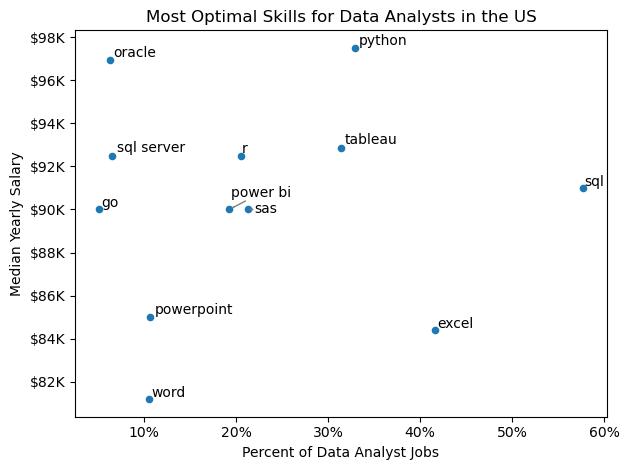

In [7]:
# Scatter Plot: Demand vs Salary
from adjustText import adjust_text

df_DA_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()

In [8]:
df['job_type_skills'].head(5)

0                                                  NaN
1    {'analyst_tools': ['power bi', 'tableau'], 'pr...
2    {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3    {'cloud': ['aws'], 'libraries': ['tensorflow',...
4    {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
Name: job_type_skills, dtype: object

In [9]:
import math

# Process Job Type ↔ Skills Mapping
df_technology = df['job_type_skills'].copy()

df_technology = df_technology.drop_duplicates().dropna()

technology_dict = {}

for row in df_technology:
    if isinstance(row, str):
        try:
            row_dict = ast.literal_eval(row)
        except Exception:
            continue
    elif isinstance(row, dict):
        row_dict = row
    else:
        continue

    for key, value in row_dict.items():
        key = str(key).strip().lower()

        if not isinstance(value, (list, tuple, set)):
            value = [value]

        value = [str(v).strip().lower() for v in value if v]

        if key in technology_dict:
            technology_dict[key].extend(value)
        else:
            technology_dict[key] = value

for key, value in technology_dict.items():
    technology_dict[key] = sorted(set(value))

technology_dict


{'analyst_tools': ['alteryx',
  'cognos',
  'datarobot',
  'dax',
  'esquisse',
  'excel',
  'looker',
  'microstrategy',
  'ms access',
  'msaccess',
  'nuix',
  'outlook',
  'power bi',
  'powerbi',
  'powerpoint',
  'qlik',
  'sap',
  'sas',
  'sharepoint',
  'sheets',
  'splunk',
  'spreadsheet',
  'spss',
  'ssis',
  'ssrs',
  'tableau',
  'visio',
  'word'],
 'programming': ['apl',
  'assembly',
  'bash',
  'c',
  'c#',
  'c++',
  'clojure',
  'cobol',
  'crystal',
  'css',
  'dart',
  'delphi',
  'elixir',
  'erlang',
  'f#',
  'fortran',
  'go',
  'golang',
  'groovy',
  'haskell',
  'html',
  'java',
  'javascript',
  'julia',
  'kotlin',
  'lisp',
  'lua',
  'matlab',
  'mongo',
  'mongodb',
  'no-sql',
  'nosql',
  'objective-c',
  'ocaml',
  'pascal',
  'perl',
  'php',
  'powershell',
  'python',
  'r',
  'ruby',
  'rust',
  'sas',
  'sass',
  'scala',
  'shell',
  'solidity',
  'sql',
  'swift',
  't-sql',
  'typescript',
  'vb.net',
  'vba',
  'visual basic',
  'visualba

In [10]:
# Build Technology-Skill DataFrame
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,alteryx
0,analyst_tools,cognos
0,analyst_tools,datarobot
0,analyst_tools,dax
0,analyst_tools,esquisse
...,...,...
9,sync,twilio
9,sync,unify
9,sync,webex
9,sync,wire


In [11]:
# Merge with skill demand/salary data
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

df_plot

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


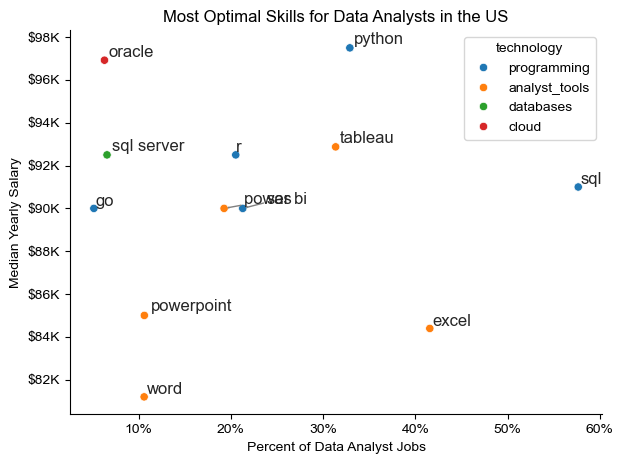

In [12]:
#df_plot.plot(kind='scatter', x='skill_percent', y='median_salary')

# Scatter Plot: Demand vs Salary by Technology
sns.scatterplot(data=df_plot, x='skill_percent', y='median_salary', hue='technology')

sns.despine()
sns.set_theme(style='ticks')

texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()

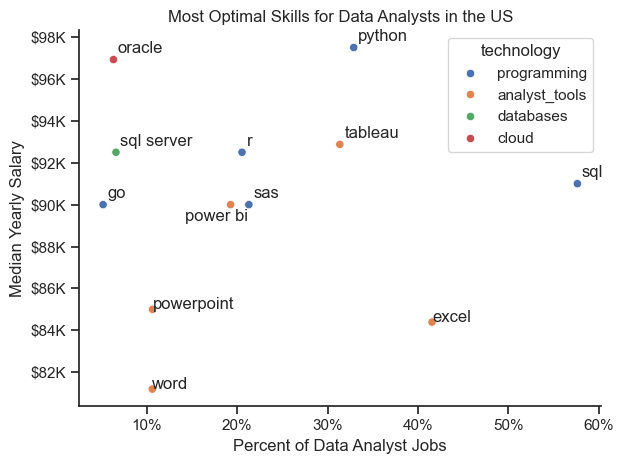

In [13]:
# Scatter Plot: Custom Label Offsets
sns.scatterplot(data=df_plot, x='skill_percent', y='median_salary', hue='technology')

sns.despine()
sns.set_theme(style='ticks')

offsets = {
    "power bi": (-5, -800),   # shift right/down
    "sas":      (0.5,  300),   
    "oracle":   (0.5,  300),   
    "python":   (0.5,  300),
    "tableau":  (0.5,  300),
    "sql":      (0.5,  300),
    "go":       (0.5,  300),
    "sql server":  (0.5,  300),
    "r":        (0.5,  300)
}

texts = []
for i, label in enumerate(df_DA_skills_high_demand.index):
    x = df_DA_skills_high_demand['skill_percent'].iloc[i]
    y = df_DA_skills_high_demand['median_salary'].iloc[i]

    dx, dy = offsets.get(label.lower(), (0, 0))  # shift only those in dict
    txt = plt.text(x + dx, y + dy, label, fontsize=12, zorder=10)
    texts.append(txt)

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()